<a href="https://colab.research.google.com/github/JThissen/Machine-Learning-using-Tensorflow/blob/master/ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class PrepareData():
  def __init__(self, dataset):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

  def reshape_normalize(self, data, name):
    data = np.array(data, dtype=np.float32)
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2]) / 255

    if(name == "x_train"):
      self.x_train = data
    elif(name == "x_test"):
      self.x_test = data

class NeuralNetwork(tf.keras.Model):
  def __init__(self, unique_classes):
    super(NeuralNetwork, self).__init__(self)
    self.layer_1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.layer_2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.layer_output = tf.keras.layers.Dense(unique_classes, activation=tf.nn.softmax)

  def call(self, x):
    x = self.layer_1(x)
    x = self.layer_output(x)
    return x

class Utilities:
  @staticmethod
  def round_number(x, decimals = 3):
    return round(x * pow(10, decimals)) / pow(10, decimals)  

  
def loss_cross_entropy(y_train, y_pred):
  y_train = tf.cast(y_train, tf.int64)
  y_train = tf.one_hot(y_train, 10)
  return tf.reduce_mean(-tf.reduce_sum(y_train * tf.math.log(y_pred)))

def optimize_network(x_train, y_train):
  with tf.GradientTape() as gt:
    y_pred = neural_network(x_train)
    loss = loss_cross_entropy(y_train, y_pred)

  gradients = gt.gradient(loss, neural_network.trainable_variables)
  optimizer.apply_gradients(zip(gradients, neural_network.trainable_variables))


prepare_data = PrepareData(tf.keras.datasets.mnist.load_data())
prepare_data.reshape_normalize(prepare_data.x_train, "x_train")
prepare_data.reshape_normalize(prepare_data.x_test, "x_test")

training_data = tf.data.Dataset.from_tensor_slices(tuple((prepare_data.x_train, prepare_data.y_train)))
training_data = training_data.batch(32)

optimizer = tf.optimizers.SGD()
neural_network = NeuralNetwork(10)

for i, (j, k) in enumerate(training_data.take(2000), 1):
  optimize_network(j, k)

  if(i % 100 == 0):
    pred = neural_network(j)
    loss = loss_cross_entropy(k, pred)
    print(f"iteration: {i}, loss: {Utilities.round_number(loss.numpy())}")

iteration: 100, loss: 3.335
iteration: 200, loss: 1.249
iteration: 300, loss: 2.788
iteration: 400, loss: 4.699
iteration: 500, loss: 1.891
iteration: 600, loss: 1.016
iteration: 700, loss: 0.533
iteration: 800, loss: 1.592
iteration: 900, loss: 1.088
iteration: 1000, loss: 0.868
iteration: 1100, loss: 0.828
iteration: 1200, loss: 1.577
iteration: 1300, loss: 1.185
iteration: 1400, loss: 0.404
iteration: 1500, loss: 0.691
iteration: 1600, loss: 0.473
iteration: 1700, loss: 1.035
iteration: 1800, loss: 0.25


(10000, 784)
Prediction: 6


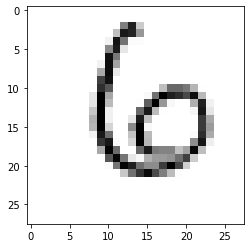

Prediction: 0


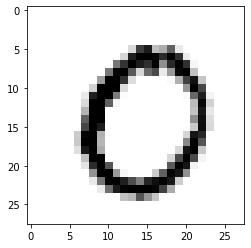

Prediction: 5


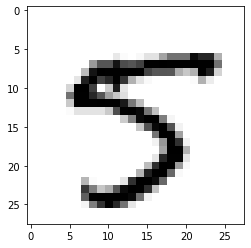

Prediction: 4


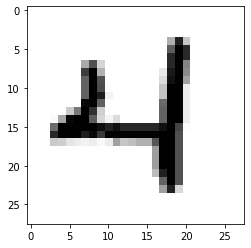

Prediction: 9


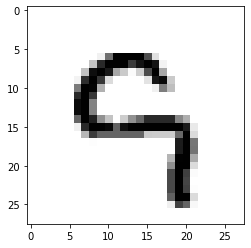

Prediction: 9


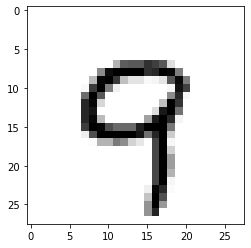

Prediction: 2


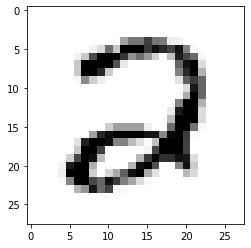

Prediction: 1


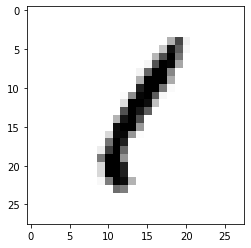

Prediction: 9


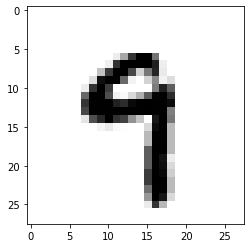

Prediction: 4


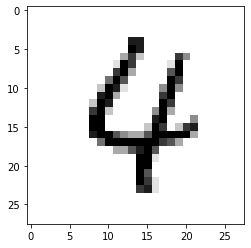

In [0]:
loop_range = [100, 110]
softmax_probabilities = neural_network(prepare_data.x_test[:loop_range[1]])
square_root = np.int8(np.sqrt(prepare_data.x_test[0].shape[0]))

for i in range(loop_range[0], loop_range[1]):
  print(f"Prediction: {np.argmax(softmax_probabilities.numpy()[i])}")
  plt.imshow(prepare_data.x_test[i].reshape(square_root, square_root), cmap="binary")
  plt.show()